In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from io import StringIO
from IPython.display import Image  
import pydotplus
import os

In [2]:
# Setting the working directory and reading the dataset
os.chdir('/Users/theovl/Downloads')
df = pd.read_csv("heart_disease_case_study+(1).csv", delimiter=';')

In [3]:
# Displaying the first 10 rows to understand the data
print(df.head(10))

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   
5   8  21914       1     151    67.0    120     80            2     2      0   
6   9  22113       1     157    93.0    130     80            3     1      0   
7  12  22584       2     178    95.0    130     90            3     3      0   
8  13  17668       1     158    71.0    110     70            1     1      0   
9  14  19834       1     164    68.0    110     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1

In [4]:
# Checking the info and null values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
c

In [5]:
# Replacing '?' with NaN and dropping missing rows
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [6]:
# Verifying no missing values remain
print(df.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [7]:
# Checking value counts for categorical features
for col in ['cholesterol', 'gluc', 'smoke', 'alco', 'active']:
    print(df[col].value_counts())


1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64
1    59479
3     5331
2     5190
Name: gluc, dtype: int64
0    63831
1     6169
Name: smoke, dtype: int64
0    66236
1     3764
Name: alco, dtype: int64
1    56261
0    13739
Name: active, dtype: int64


In [8]:
# Encoding categorical variables using pd.get_dummies
df = pd.get_dummies(data=df, columns=['gender', 'cholesterol', 'gluc'], drop_first=True)

# Splitting data into features (X) and target (y)
X = df.drop('cardio', axis=1)
y = df['cardio']

In [9]:
# Splitting the data into training and test sets (70/30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [10]:
# Building the initial decision tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Making predictions and evaluating the default model
predictions = model.predict(X_test)
print("Classification Report for Default Model:\n", classification_report(y_test, predictions))
print("Confusion Matrix for Default Model:\n", confusion_matrix(y_test, predictions))

Classification Report for Default Model:
               precision    recall  f1-score   support

           0       0.63      0.64      0.63     10543
           1       0.63      0.63      0.63     10457

    accuracy                           0.63     21000
   macro avg       0.63      0.63      0.63     21000
weighted avg       0.63      0.63      0.63     21000

Confusion Matrix for Default Model:
 [[6699 3844]
 [3899 6558]]


In [11]:
# Calculating the accuracy of the default model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the default decision tree: {accuracy}")

Accuracy of the default decision tree: 0.6312857142857143


In [ ]:
# Refer to following resources for more information:
# https://blog.quantinsti.com/gini-index/
# https://scikit-learn.org/1.5/modules/grid_search.html


In [21]:
# Plotting the default decision tree
features = X.columns
dot_data = StringIO()

# Export tree to DOT format
export_graphviz(model, out_file=dot_data, feature_names=features, 
                filled=True, rounded=True, special_characters=True)

# Create graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())



dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0872551 to fit



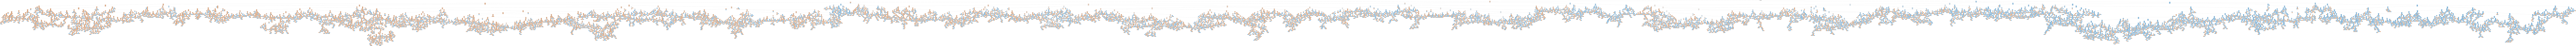

In [22]:
# Display the tree
Image(graph.create_png())


In [15]:
# Performing Grid Search for Hyperparameter Tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

In [23]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=101),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy', verbose=1)

In [24]:
# Displaying the best parameters and accuracy from Grid Search
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best parameters found: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation accuracy: 0.7310816326530614


In [25]:
# Building and evaluating the optimized decision tree
optimal_model = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'],
                                        max_depth=grid_search.best_params_['max_depth'],
                                        min_samples_split=grid_search.best_params_['min_samples_split'],
                                        min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                        random_state=101)

optimal_model.fit(X_train, y_train)
optimal_predictions = optimal_model.predict(X_test)

# Evaluating the optimized model
optimal_accuracy = accuracy_score(y_test, optimal_predictions)
print("Accuracy with optimal hyperparameters:", optimal_accuracy)

Accuracy with optimal hyperparameters: 0.7302380952380952


In [26]:
# Change in accuracy
accuracy_change = optimal_accuracy - accuracy
print(f"Change in accuracy after using optimal hyperparameters: {accuracy_change}")

Change in accuracy after using optimal hyperparameters: 0.0989523809523809


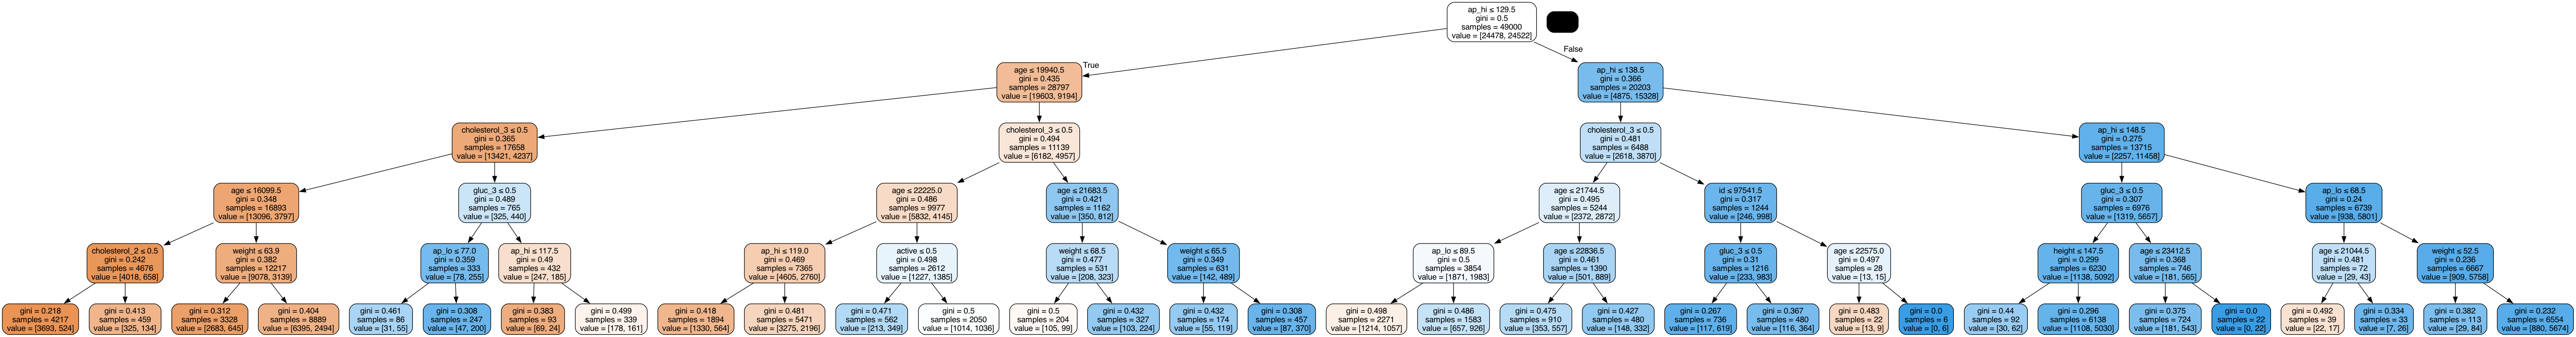

In [27]:
# Plotting the optimized decision tree
dot_data = StringIO()
export_graphviz(optimal_model, out_file=dot_data, feature_names=features, 
                filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())